In [2]:
import cobra

# Quicker way to read in models
import pickle
def read_model(fileName, obj='none'):
    
    fileType = fileName.split('.')[-1]
    
    if fileType == 'sbml' or fileType == 'xml':
        model = cobra.io.read_sbml_model(fileName)
    elif fileType == 'json':
        model = cobra.io.load_json_model(fileName)
    elif fileType == 'yaml':
        model = cobra.io.load_yaml_model(fileName)
    elif fileType == 'mat':
        model = cobra.io.load_matlab_model(fileName)
    elif fileType == 'pkl':
        model = pickle.load(open(fileName, 'rb'))
    else:
        raise TypeError('Unrecognized file extension')
    
    if obj != 'none': model.objective = obj
    for rxn in model.boundary: rxn.bounds = (-1000., 1000.)
        
    return model


In [ ]:
iCdG692 = read_model('/home/mjenior/Desktop/repos/Jenior_Cdifficile_2019/data/reconstructions/iCdG692.json')
iCdR700 = read_model('/home/mjenior/Desktop/repos/Jenior_Cdifficile_2019/data/reconstructions/iCdR700.json')

In [ ]:
# Set media
mdm_noGluc = ['EX_cpd00001_e', # water
       'EX_cpd00065_e', # L-Tryptophan
       'EX_cpd00060_e', # L-Methionine
       'EX_cpd00322_e', # L-Isoleucine
       'EX_cpd00129_e', # L-Proline
       'EX_cpd00156_e', # L-Valine
       'EX_cpd00107_e', # L-Leucine
       'EX_cpd00084_e', # L-Cysteine 
       'EX_cpd00149_e', # Cobalt
       'EX_cpd00099_e', # Chloride
       'EX_cpd10515_e', # Iron
       'EX_cpd00030_e', # Manganese
       'EX_cpd00254_e', # Magnesium
       'EX_cpd00063_e', # Calcium
       'EX_cpd00205_e', # Potassium
       'EX_cpd00009_e', # Phosphate
       'EX_cpd00971_e', # Sodium
       'EX_cpd00242_e', # Carbonate
       'EX_cpd00104_e', # Biotin
       'EX_cpd00644_e', # Pantothenate
       'EX_cpd00263_e'] # Pyridoxine

for rxn in iCdG692.boundary:
    if not rxn.id in mdm_noGluc:
        rxn.bounds = (0., 1000.)
    else:
        rxn.bounds = (-1000., 1000.)
for rxn in iCdR700.boundary:
    if not rxn.id in mdm_noGluc:
        rxn.bounds = (0., 1000.)
    else:
        rxn.bounds = (-1000., 1000.)
        
mdm_noGluc_cpds = ['cpd00001_e','cpd00065_e','cpd00060_e','cpd00322_e','cpd00129_e','cpd00156_e',
                   'cpd00107_e','cpd00084_e','cpd00149_e','cpd00099_e','cpd10515_e','cpd00030_e',
                   'cpd00254_e','cpd00063_e','cpd00205_e','cpd00009_e','cpd00971_e','cpd00242_e',
                   'cpd00104_e','cpd00644_e','cpd00263_e']

biolog_cpds = ['cpd00383','cpd00162','cpd00438','cpd00654',
               'cpd00277','cpd03279','cpd00412','cpd00136','cpd00339',
               'cpd00027','cpd00208','cpd03561','cpd00029','cpd00142','cpd00182','cpd00152',
               'cpd29695','cpd29696','cpd11586','cpd29694','cpd29697','cpd29698','cpd11582','cpd03697',
               'cpd00085','cpd00211','cpd00098','cpd00137','cpd00424','cpd00367','cpd00307','cpd00731',
               'cpd29694','cpd29698','cpd00117','cpd00339','cpd00320','cpd00158','cpd00082','cpd00072',
               'cpd00108','cpd00276','cpd00089','cpd00079','cpd00186','cpd00314','cpd00138','cpd05161',
               'cpd00637','cpd00644','cpd00105','cpd00588','cpd00161','cpd00794','cpd00154','cpd00080',
               'cpd00504','cpd00130','cpd00393','cpd00378','cpd00047','cpd00106','cpd00281','cpd03561',
               'cpd00042','cpd11581','cpd15603','cpd29691','cpd11592','cpd15604','cpd29693','cpd11588',
               'cpd00100','cpd00033','cpd00155','cpd00139','cpd00207','cpd00311','cpd29317','cpd00165',
               'cpd00226','cpd00246','cpd00035','cpd00224','cpd00051','cpd00132','cpd00041','cpd00274',
               'cpd00395','cpd00084','cpd00751','cpd00023','cpd00053','cpd00119','cpd00227','cpd00322',
               'cpd00159','cpd00107','cpd00039','cpd00130','cpd00060','cpd00064','cpd00066','cpd00129',
               'cpd00054','cpd00161','cpd00065','cpd00069','cpd00156','cpd00489','cpd00121','cpd00179',
               'cpd29700','cpd27607','cpd00122','cpd00492','cpd00477','cpd00232','cpd00075',
               'cpd00738','cpd08928','cpd00247','cpd00443','cpd00489','cpd00009','cpd00457','cpd00141',
               'cpd00118','cpd00215','cpd00020','cpd00220','cpd01030','cpd00036','cpd00076','cpd00210',
               'cpd03047','cpd00305','cpd00793','cpd00184','cpd00151','cpd20885','cpd00374','cpd00092',
               'cpd00300','cpd00249','cpd00309','cpd01217']

In [14]:
model = read_model('/home/mjenior/Desktop/repos/Jenior_Cdifficile_2019/data/reconstructions/iCdG692.json')

mdm_noGluc = {'EX_cpd00001_e': -1000., # water
              'EX_cpd00065_e': -100., # L-Tryptophan
              'EX_cpd00060_e': -100., # L-Methionine
              'EX_cpd00322_e': -100., # L-Isoleucine
              'EX_cpd00129_e': -100., # L-Proline
              'EX_cpd00156_e': -100., # L-Valine
              'EX_cpd00107_e': -100., # L-Leucine
              'EX_cpd00084_e': -100., # L-Cysteine 
              'EX_cpd00149_e': -10., # Cobalt
              'EX_cpd00099_e': -10., # Chloride
              'EX_cpd10515_e': -10., # Iron
              'EX_cpd00030_e': -10., # Manganese
              'EX_cpd00254_e': -10., # Magnesium
              'EX_cpd00063_e': -10., # Calcium
              'EX_cpd00205_e': -10., # Potassium
              'EX_cpd00009_e': -10., # Phosphate
              'EX_cpd00971_e': -10., # Sodium
              'EX_cpd00242_e': -10., # Carbonate
              'EX_cpd00104_e': -10., # Biotin
              'EX_cpd00644_e': -10., # Pantothenate
              'EX_cpd00263_e': -10.} # Pyridoxine

for rxn in model.boundary: 
    try:
        rxn.lowed_bound = mdm_noGluc[rxn.id]
    except KeyError:
        rxn.bounds = (0., 1000.)

print(model.slim_optimize())

32.240862820799514


In [15]:
# DFBA function

import numpy as np
from tqdm import tqdm

from scipy.integrate import solve_ivp


import matplotlib.pyplot as plt
%matplotlib inline

def add_dynamic_bounds(model, y):
    """Use external concentrations to bound the uptake flux of glucose."""
    biomass, glucose = y  # expand the boundary species
    glucose_max_import = -10 * glucose / (5 + glucose)
    model.reactions.EX_cpd00027_e.lower_bound = glucose_max_import


def dynamic_system(t, y):
    """Calculate the time derivative of external species."""

    biomass, glucose = y  # expand the boundary species

    # Calculate the specific exchanges fluxes at the given external concentrations.
    with model:
        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['biomass', 'EX_cpd00027_e'], ['max', 'max'])

    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= biomass

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:
        add_dynamic_bounds(model, y)
        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True


In [16]:
ts = np.linspace(0, 15, 100)  # Desired integration resolution and interval
y0 = [0.1, 10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )


t = 0.651: : 3154it [2:02:09,  2.32s/it]


In [17]:
sol

  message: 'Required step size is less than spacing between numbers.'
     nfev: 2637
     njev: 171
      nlu: 697
      sol: None
   status: -1
  success: False
        t: array([0.        , 0.15151515, 0.3030303 , 0.45454545, 0.60606061])
 t_events: [array([], dtype=float64)]
        y: array([[ 1.00000000e-01,  1.43716482e+01,  1.93657168e+03,
         2.56189137e+05,  3.38915895e+07],
       [ 1.00000000e+01,  7.25162383e+00,  1.17158604e-07,
        -4.44242025e-11,  4.81926842e-06]])

Text(0, 0.5, 'Glucose')

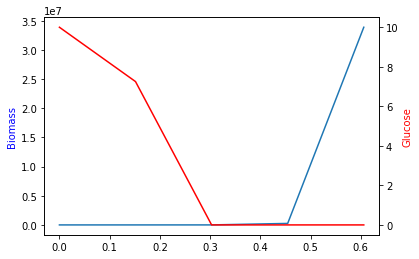

In [18]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y.T[:, 0])
ax2 = plt.twinx(ax)
ax2.plot(sol.t, sol.y.T[:, 1], color='r')

ax.set_ylabel('Biomass', color='b')
ax2.set_ylabel('Glucose', color='r')